# Bone ROC new Train (train data)

## Import data

In [1]:
import numpy as np

pdata = np.load('1_xxjust_two_3fold_db_lr002_YYYY_saved_models_T_32-32-64-64-128-128-512_e200/end_y_predict.npy')
print(pdata.shape)

odata = np.load('1_xxjust_two_3fold_db_lr002_YYYY_saved_models_T_32-32-64-64-128-128-512_e200/end_y_test.npy')
odata = np.array(odata)[np.newaxis]
print(odata.T.shape)

n_classes = pdata.shape[1]

(24784, 1)
(24784, 1)


## ROC curve and AUC

In [2]:
from sklearn import metrics

fpr = []
tpr = []
roc_auc = []
for i in range(n_classes):
    ftemp, ttemp, _ = metrics.roc_curve(odata.T[:,i], pdata[:,i])
    fpr.append(ftemp)
    tpr.append(ttemp)
    roc_auc.append(metrics.auc(fpr[i], tpr[i]))

roc_auc

[0.748508592613323]

## Plot ROC curve

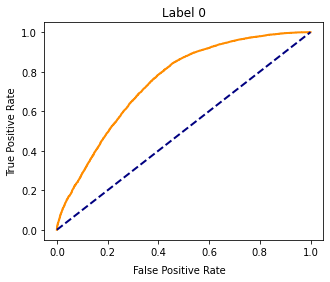

In [3]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(1, 1, sharex=True, sharey=True)
fig.set_figwidth(5)
lw = 2
ax1.plot(
    fpr[0],
    tpr[0],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[0],
)
ax1.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

# ax2.plot(
#     fpr[1],
#     tpr[1],
#     color="darkorange",
#     lw=lw,
#     label="ROC curve (area = %0.2f)" % roc_auc[1],
# )
# ax2.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

# ax3.plot(
#     fpr[2],
#     tpr[2],
#     color="darkorange",
#     lw=lw,
#     label="ROC curve (area = %0.2f)" % roc_auc[2],
# )
# ax3.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

ax1.set_title('Label 0')
# ax2.set_title('Label 1')
# ax3.set_title('Label 2')

ax1.set(ylabel='True Positive Rate')
fig.text(0.5, 0.01, 'False Positive Rate', ha='center')
plt.show()